In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)


In [5]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=430fbfd2490d9e9a0901410c74409c5769796a750cd20948c7ead6ba1e9fb8cd
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


In [6]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

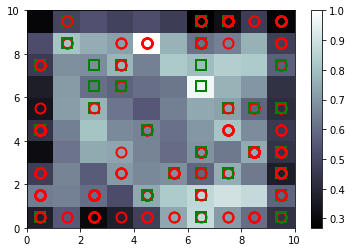

In [16]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
  w = som.winner(j)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [17]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(6, 1)], mappings[(6, 0)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [29]:
len(dataset)

690

In [23]:
customers = dataset.iloc[:, 1:].values

In [30]:
is_fraud = np.zeros(len(dataset))

In [32]:
for i in range(len(dataset)):
  if(dataset.iloc[i, 0] in frauds):
    is_fraud[i] = 1

In [33]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)


Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.9870
Epoch 2/2
690/690 [==============================] - 1s 916us/step - loss: 0.1115 - accuracy: 0.9870


In [37]:
y_pred = classifier.predict(customers)

In [39]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [40]:
y_pred

array([[1.57761560e+07, 3.22773159e-02],
       [1.57395480e+07, 2.88694799e-02],
       [1.56628540e+07, 1.03139877e-02],
       ...,
       [1.56754500e+07, 5.55872023e-02],
       [1.57764940e+07, 1.01542719e-01],
       [1.55924120e+07, 4.61544693e-02]])

In [41]:
y_pred = y_pred[y_pred[:, 1].argsort()]